In [5]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pathlib import Path

# Optional: schöneres Plot-Layout
#plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [6]:
#neuesten run
# Beispiel: Variant 'v4', letzter Run
variant = 'v4'
base = Path('../experiments') / variant

# ältesten bzw. neuesten Run-Ordner ermitteln
runs = sorted([d for d in base.iterdir() if d.is_dir()])
run_dir = runs[-1]  # letzter = aktuellster
print("Verwende Run:", run_dir)

# JSON-Logs liegen in:
json_folder = run_dir / 'json_logs'
files = sorted(json_folder.glob('*.json'))
print(f"Gefundene JSON-Log-Dateien: {len(files)}")


Verwende Run: ..\experiments\v4\20250425_093002
Gefundene JSON-Log-Dateien: 6


In [ ]:
# zum auswählen
variant = 'v4'
base = Path('experiments') / variant
runs = sorted([d for d in base.iterdir() if d.is_dir()])

dd = widgets.Dropdown(
    options=[(r.name, r) for r in runs],
    description='Run:'
)
display(dd)

In [ ]:
run_dir = dd.value
print("Verwende Run:", run_dir)

files = sorted((run_dir/'json_logs').glob('*.json'))
print(f"Gefundene JSON-Log-Dateien: {len(files)}")

In [10]:
json_folder = run_dir / 'json_logs'
json_files  = sorted(json_folder.glob('*.json'))
print(f"{len(json_files)} JSON-Dateien gefunden")

6 JSON-Dateien gefunden


In [11]:
# 3) Alle Einträge in eine Liste laden
records = []
for jf in json_files:
    data = json.loads(jf.read_bytes())
    # data ist Liste von Dikt {'step':…, 'x':…, 'y':…, …}
    records.extend(data)

# 4) In DataFrame verwandeln
df = pd.DataFrame.from_records(records)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393216 entries, 0 to 393215
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              393216 non-null  int64  
 1   x                 393216 non-null  int64  
 2   y                 393216 non-null  int64  
 3   map               393216 non-null  int64  
 4   max_map_progress  393216 non-null  int64  
 5   last_action       393216 non-null  int64  
 6   pcount            393216 non-null  int64  
 7   levels            393216 non-null  object 
 8   levels_sum        393216 non-null  int64  
 9   ptypes            393216 non-null  object 
 10  hp                393216 non-null  float64
 11  coord_count       393216 non-null  int64  
 12  deaths            393216 non-null  int64  
 13  badge             393216 non-null  int64  
 14  event             393216 non-null  float64
 15  healr             393216 non-null  float64
dtypes: float64(3), int64

,step,x,y,map,max_map_progress,last_action,pcount,levels,levels_sum,ptypes,hp,coord_count,deaths,badge,event,healr
0,0,3,6,38,0,3,0,"[0, 0, 0, 0, 0, 0]",0,"[255, 0, 0, 0, 0, 0]",0.0,0,0,0,0.0,0.0
1,1,4,6,38,0,2,0,"[0, 0, 0, 0, 0, 0]",0,"[255, 0, 0, 0, 0, 0]",0.0,1,0,0,0.0,0.0
2,2,4,6,38,0,6,0,"[0, 0, 0, 0, 0, 0]",0,"[255, 0, 0, 0, 0, 0]",0.0,2,0,0,0.0,0.0
3,3,4,6,38,0,0,0,"[0, 0, 0, 0, 0, 0]",0,"[255, 0, 0, 0, 0, 0]",0.0,2,0,0,0.0,0.0
4,4,4,6,38,0,5,0,"[0, 0, 0, 0, 0, 0]",0,"[255, 0, 0, 0, 0, 0]",0.0,2,0,0,0.0,0.0


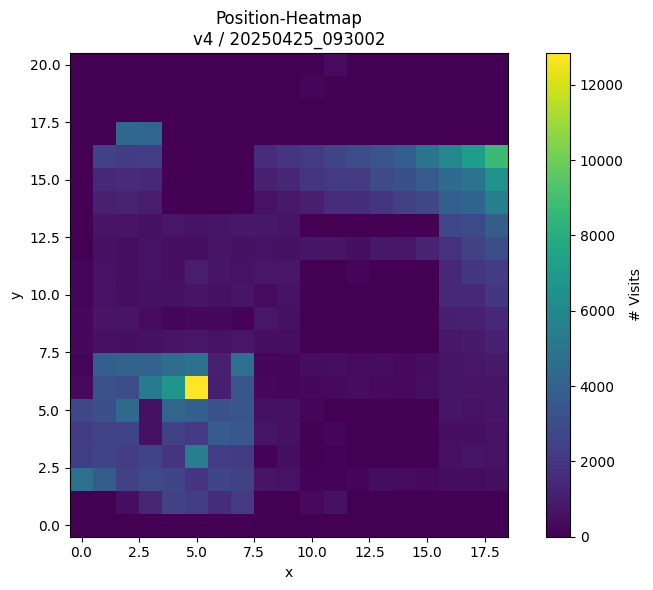

In [13]:
# Sämtliche (x,y)-Paare zählen
df_xy = df.dropna(subset=['x','y'])      # leere x/y rausfiltern
counts = df_xy.groupby(['y','x']).size() # Serie mit MultiIndex (y,x)

# In Matrix gießen
heatmap = counts.unstack(fill_value=0)   # rows=y, cols=x

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(
    heatmap.values,
    origin='lower',               # y=0 unten
    aspect='equal',
    interpolation='nearest'
)
plt.colorbar(label='# Visits')
plt.title(f"Position-Heatmap\n{variant} / {run_dir.name}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()
